In [24]:
import numpy as np
import matplotlib.pyplot as plt

# calc as L0 norm
def onsager(z, r, tau, n):
    return (z/n) * np.sum(eta(r, tau) != 0)

def eta(u, T):
    return (u - T)*(u >= T) + (u + T)*(u <= -T)

In [34]:
N = 1024
k = 40
avg_over = 200 
num_iterations = 100

# create k sparse x vector
x = np.zeros((N, 1))
idx_nonzero_entries = np.random.permutation(N)[0:k]
x[idx_nonzero_entries] = 1

# arrays to plot with
avg_mse = np.zeros(6)
n_vec = np.arange(200, 320, 20)

In [35]:
curr_mse = 0
cnt = 0
for loc_n in range(200, 320, 20):
    for avg in range(avg_over):
        # compute first A and y
        A = np.sqrt(1/loc_n)*np.random.randn(loc_n, N)
        y = A @ x 
        # rst z, r, tau, xHt for next iteration
        z = np.zeros(y.shape)
        r = np.zeros(x.shape)
        tau = 0
        xHt = np.zeros(x.shape)
        for idx_iter in range(num_iterations):
            ons = onsager(z, r, tau, loc_n) #calulate next onsager
            z = y - A @ xHt + ons
            tau = np.sqrt((1/loc_n)) * np.linalg.norm(z)
            r = xHt + A.T @ z
            xHt = eta(r, tau)
        # holds running total of mse
        curr_mse += (1/N) * sum((x-xHt)**2)
    avg_mse[cnt] = (1/avg_over) * curr_mse
    curr_mse = 0 # reset for next n
    cnt += 1
        
print(avg_mse)  

[2.55252882e+31 5.00829549e+15 2.34736519e+28 8.98570324e+15
 1.93883239e-03 7.99952602e-05]


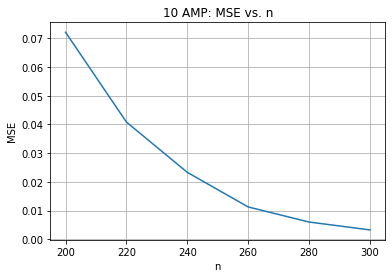

In [31]:
# plot the results
plt.figure()
plt.plot(n_vec, avg_mse)
plt.title(f"{num_iterations} AMP: MSE vs. n")
plt.xlabel("n")
plt.ylabel("MSE")
plt.grid(True, which='both')
plt.show()